In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fedavg_loss = pd.read_csv("./CSV/FedAvg_loss.csv")
fedavg_metric = pd.read_csv("./CSV/FedAvg_metrics.csv")
fedprox_loss = pd.read_csv("./CSV/FedProx_loss.csv")
fedprox_metric = pd.read_csv("./CSV/FedProx_metrics.csv")

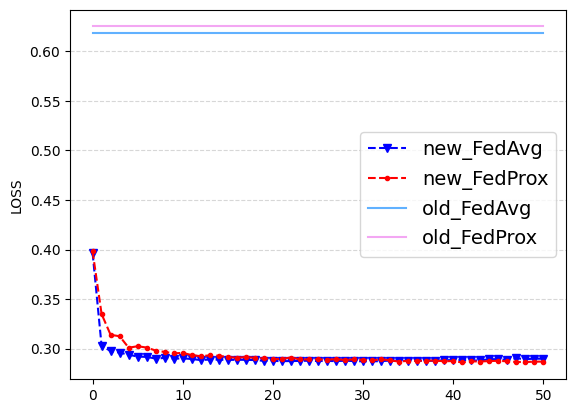

In [3]:
plt.plot(fedavg_loss["1"], color="b", linestyle="dashed", marker="v",label="new_FedAvg")
plt.plot(fedprox_loss["1"], color="r", linestyle="dashed", marker=".",label="new_FedProx")
plt.plot([0.6187]*len(fedavg_loss), color="dodgerblue", label="old_FedAvg", alpha=0.7)
plt.plot([0.6250]*len(fedprox_loss), color="violet", label="old_FedProx", alpha=0.7)
plt.ylabel("loss".upper())
plt.grid(True, axis="y", alpha=0.5, linestyle="dashed")
plt.legend(fontsize=14)
plt.show()

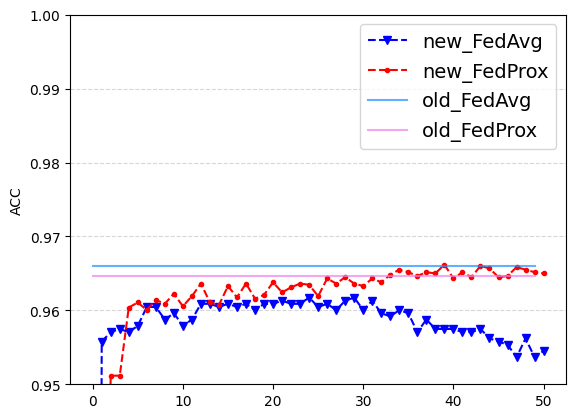

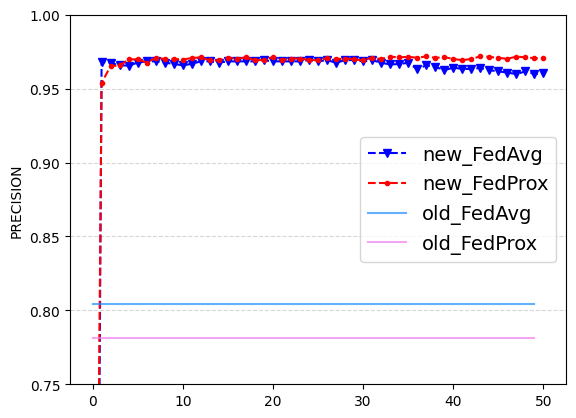

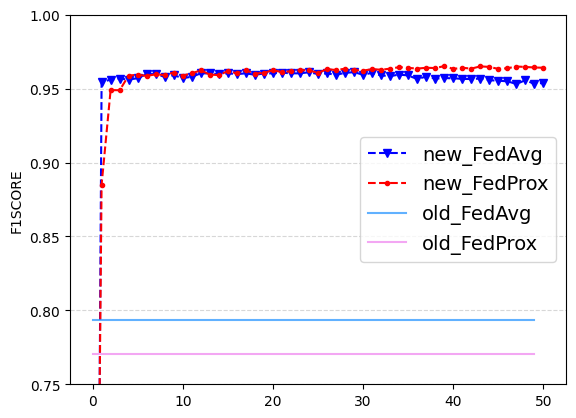

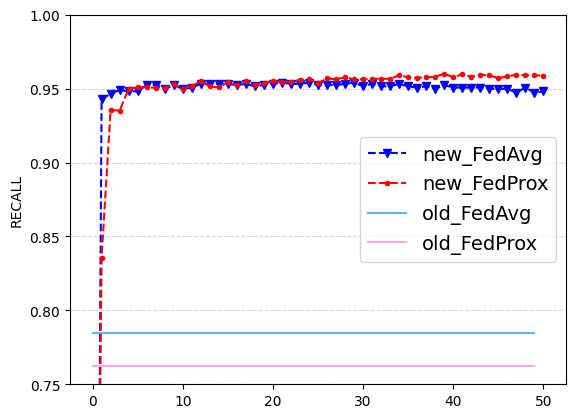

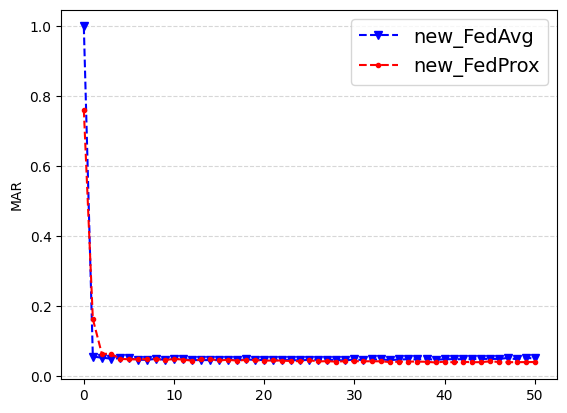

In [4]:
fedavgkeys = fedavg_metric.columns
old_fedavg= {"acc":0.9660,"precision":0.8040,"f1score":0.7935,"recall":0.7850,"MAR": 0.1}
old_fedprox= {"acc":0.9657,"precision":0.7822,"f1score":0.7717,"recall":0.7631,"MAR": 0.1}
for key in fedavgkeys:
    plt.plot(fedavg_metric[key].apply(lambda x: float(x.split(",")[1].replace(")", ""))),color="b", linestyle="dashed", marker="v", label="new_FedAvg")
    plt.plot(fedprox_metric[key].apply(lambda x: float(x.split(",")[1].replace(")", ""))),color="r", linestyle="dashed", marker=".", label="new_FedProx")
    if key != "MAR":
        plt.plot(range(50), [old_fedavg[key]]*50, color="dodgerblue", label="old_FedAvg", alpha=0.7)
        plt.plot(range(50), [old_fedprox[key]-0.001]*50, color="violet", label="old_FedProx", alpha=0.7)
    plt.ylabel(key.upper())
    plt.grid(True, axis="y", alpha=0.5, linestyle="dashed")
    plt.legend(fontsize=14)
    if key == "acc":
        plt.ylim(0.95,1)
    if key == "precision":
        plt.ylim(0.75,1)
    if key == "f1score":
        plt.ylim(0.75,1)
    if key == "recall":
        plt.ylim(0.75,1)
    if key ==" MAR":
        plt.ylim(-0.1, 0.3)
    plt.show()

In [5]:
import pandas as pd
frame=pd.DataFrame([[fedavg_metric[key].apply(lambda x: float(x.split(",")[1].replace(")", ""))).max(), fedprox_metric[key].apply(lambda x: float(x.split(",")[1].replace(")", ""))).max()] if key!="MAR" else [fedavg_metric[key].apply(lambda x: float(x.split(",")[1].replace(")", ""))).min(), fedprox_metric[key].apply(lambda x: float(x.split(",")[1].replace(")", ""))).min()] for key in fedavgkeys],index=fedavgkeys,columns=["FedAvg", "FedProx"])
frame.T.to_markdown("./table.md")

